In [4]:
# import all packages that might be useful
import sys # to manipulate different part of python runtime environment
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima


In [5]:
df = pd.read_csv(r'ncdc_covid_data.csv')

In [6]:
df

,Date,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
0,8/21/2021,186635,1064,2260,13,168320,16055
1,8/22/2021,187023,388,2268,8,168455,16300
2,8/23/2021,187588,565,2276,8,168818,16494
3,8/24/2021,188243,655,2281,5,169035,16927
4,8/25/2021,188880,637,2288,7,169382,17210
5,8/26/2021,189715,835,2298,10,169626,17791
6,8/27/2021,190333,618,2308,10,169815,18210
7,8/28/2021,190983,650,2361,53,178047,10575
8,8/29/2021,191345,362,2454,93,178283,10608
9,8/30/2021,191805,460,2455,1,178492,10858


In [7]:
df.head()

,Date,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
0,8/21/2021,186635,1064,2260,13,168320,16055
1,8/22/2021,187023,388,2268,8,168455,16300
2,8/23/2021,187588,565,2276,8,168818,16494
3,8/24/2021,188243,655,2281,5,169035,16927
4,8/25/2021,188880,637,2288,7,169382,17210


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             19 non-null     object
 1   Confirmed cases  19 non-null     int64 
 2   New cases        19 non-null     int64 
 3   Total deaths     19 non-null     int64 
 4   New deaths       19 non-null     int64 
 5   Total recovery   19 non-null     int64 
 6   Active cases     19 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.0+ KB


In [9]:
#Make the date column be of date data type. It is of object data type by default
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df=df.set_index('Date')

In [11]:
df.head()

,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
Date,,,,,,
2021-08-21,186635,1064,2260,13,168320,16055
2021-08-22,187023,388,2268,8,168455,16300
2021-08-23,187588,565,2276,8,168818,16494
2021-08-24,188243,655,2281,5,169035,16927
2021-08-25,188880,637,2288,7,169382,17210


In [12]:
df.tail()

,Confirmed cases,New cases,Total deaths,New deaths,Total recovery,Active cases
Date,,,,,,
2021-09-04,195052,964,2522,27,182463,10067
2021-09-05,195511,459,2552,30,184530,8429
2021-09-06,195890,379,2556,4,184882,8452
2021-09-07,196487,597,2573,17,185159,8755
2021-09-08,197046,559,2578,5,185379,9089


In [13]:
df.shape

(19, 6)

In [14]:
#Check if there are missing values. The output shows ther are no missing values
df.isnull().sum()

Confirmed cases    0
New cases          0
Total deaths       0
New deaths         0
Total recovery     0
Active cases       0
dtype: int64

## ARIMA

### Our focus here is to forecast for New cases, New deaths and Total recovery. So, we will focus on these three variables.

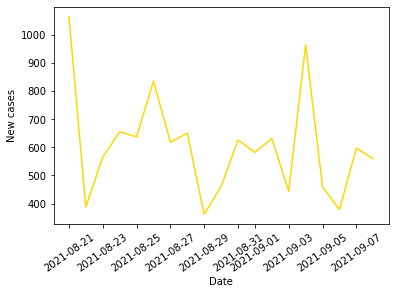

In [15]:
#Plot the variables to observes the trends present in them
sns.lineplot(df.index,df['New cases'],color='gold')
plt.xlabel('Date')
plt.xticks(rotation=35);

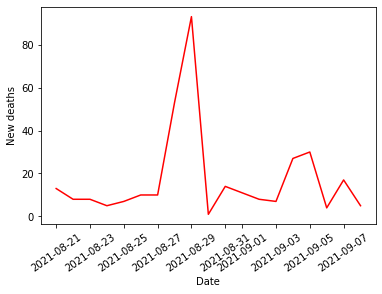

In [16]:
sns.lineplot(df.index,df['New deaths'],color='r')
plt.xlabel('Date')
plt.xticks(rotation=35);

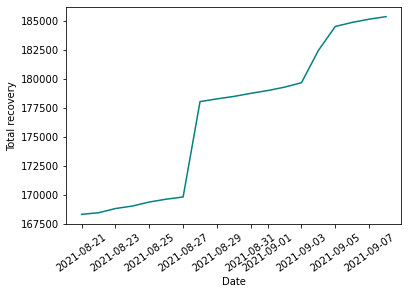

In [17]:
sns.lineplot(df.index,df['Total recovery'],color='teal')
plt.xlabel('Date')
plt.xticks(rotation=35);

## Perform ARIMA model for the variable - New cases

In [18]:
model_new_cases = auto_arima(df['New cases'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=258.999, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=251.554, Time=0.52 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=257.124, Time=0.07 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=248.599, Time=0.90 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=249.455, Time=0.94 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.31 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.66 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=246.854, Time=0.38 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=249.783, Time=0.22 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=247.564, Time=0.54 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.55 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec

Best mode

In [19]:
print(model_new_cases.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -120.427
Date:                Tue, 14 Sep 2021   AIC                            246.854
Time:                        17:16:04   BIC                            249.354
Sample:                             0   HQIC                           247.103
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0586      0.236     -4.482      0.000      -1.522      -0.596
ar.L2         -0.5430      0.243     -2.235      0.025      -1.019      -0.067
sigma2      8.545e+04   5.23e+04      1.635      0.1

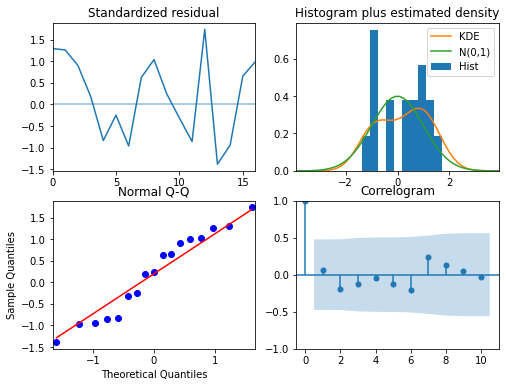

In [20]:
#Diagnostic plot for the new cases ARIMA model conducted
model_new_cases.plot_diagnostics(figsize=(8,6))
plt.show()

In [33]:
#Forecast the new cases for the next 7 days
n_periods=7
forecast_new_cases= model_new_cases.predict(n_periods)
forecast_new_cases= pd.DataFrame(forecast_new_cases,columns=['New_cases_prediction'])

In [48]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [49]:
forecast_new_cases['Date']=date

In [55]:
forecast_new_cases = forecast_new_cases[['Date','New_cases_prediction']]

In [56]:
forecast_new_cases

,Date,New_cases_prediction
0,2021-09-09,630.193754
1,2021-09-10,724.803061
2,2021-09-11,735.329049
3,2021-09-12,822.154566
4,2021-09-13,873.864711
5,2021-09-14,921.317451
6,2021-09-15,992.345663


## Perform ARIMA model for the variable - New deaths

In [60]:
model_new_deaths = auto_arima(df['New deaths'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.02 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=181.633, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=178.798, Time=0.52 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=179.635, Time=0.12 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=176.053, Time=0.68 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=176.466, Time=1.18 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=174.057, Time=0.47 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=176.798, Time=0.37 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=174.474, Time=0.75 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.68 sec

Best mode

In [61]:
print(model_new_deaths.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -84.028
Date:                Wed, 15 Sep 2021   AIC                            174.057
Time:                        02:21:25   BIC                            176.556
Sample:                             0   HQIC                           174.305
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7315      0.635     -1.152      0.249      -1.976       0.513
ar.L2         -0.4756      0.265     -1.795      0.073      -0.995       0.044
sigma2      1097.9937    285.603      3.844      0.0

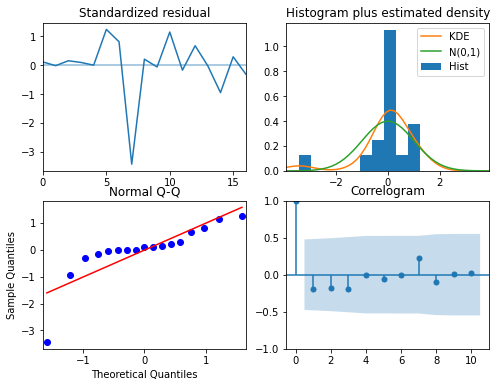

In [62]:
#Diagnostic plot for the new deaths ARIMA model conducted
model_new_deaths.plot_diagnostics(figsize=(8,6))
plt.show()

In [70]:
#Forecast the new deaths for the next 7 days
n_periods=7
forecast_new_deaths= model_new_deaths.predict(n_periods=n_periods)
forecast_new_deaths= pd.DataFrame(forecast_new_deaths,columns=['New_deaths_prediction'])

In [71]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [72]:
forecast_new_deaths['Date']=date

In [73]:
forecast_new_deaths = forecast_new_deaths[['Date','New_deaths_prediction']]

In [74]:
forecast_new_deaths

,Date,New_deaths_prediction
0,2021-09-09,-7.260488
1,2021-09-10,-7.440471
2,2021-09-11,-16.333621
3,2021-09-12,-24.598436
4,2021-09-13,-29.178921
5,2021-09-14,-36.753378
6,2021-09-15,-43.889965


## Perform ARIMA model for the variable - Total recovery

In [77]:
model_total_recovery = auto_arima(df['Total recovery'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=False,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=326.746, Time=0.76 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=322.702, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=324.947, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=324.838, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=320.703, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.331 seconds


In [78]:
print(model_total_recovery.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -159.352
Date:                Wed, 15 Sep 2021   AIC                            320.703
Time:                        02:24:37   BIC                            321.536
Sample:                             0   HQIC                           320.786
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.02e+06   1.52e+06      5.288      0.000    5.05e+06     1.1e+07
Ljung-Box (L1) (Q):                   4.44   Jarque-Bera (JB):                13.88
Prob(Q):                              0.04   Pr

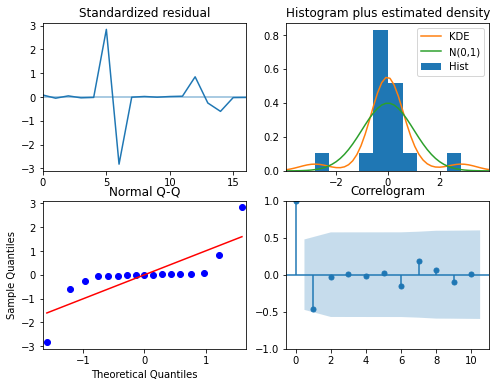

In [79]:
#Diagnostic plot for the total recovery ARIMA model conducted
model_total_recovery.plot_diagnostics(figsize=(8,6))
plt.show()

In [80]:
#Forecast the total recovery for the next 7 days
n_periods=7
forecast_total_recovery= model_total_recovery.predict(n_periods=n_periods)
forecast_total_recovery= pd.DataFrame(forecast_total_recovery,columns=['Total_recovery_prediction'])

In [82]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [85]:
forecast_total_recovery['Date']=date

In [87]:
forecast_total_recovery = forecast_total_recovery[['Date','Total_recovery_prediction']]

In [88]:
forecast_total_recovery

,Date,Total_recovery_prediction
0,2021-09-09,185599.0
1,2021-09-10,185819.0
2,2021-09-11,186039.0
3,2021-09-12,186259.0
4,2021-09-13,186479.0
5,2021-09-14,186699.0
6,2021-09-15,186919.0


## SARIMA

## Perform SARIMA model for the variable - New cases

In [142]:
smodel_new_cases = auto_arima(df['New cases'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=257.124, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=249.783, Time=0.26 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=246.854, Time=0.55 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=247.564, Time=0.59 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.67 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=248.599, Time=0.78 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 4.416 seconds


In [143]:
print(smodel_new_cases.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -120.427
Date:                Tue, 14 Sep 2021   AIC                            246.854
Time:                        15:11:11   BIC                            249.354
Sample:                             0   HQIC                           247.103
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0586      0.236     -4.482      0.000      -1.522      -0.596
ar.L2         -0.5430      0.243     -2.235      0.025      -1.019      -0.067
sigma2      8.545e+04   5.23e+04      1.635      0.1

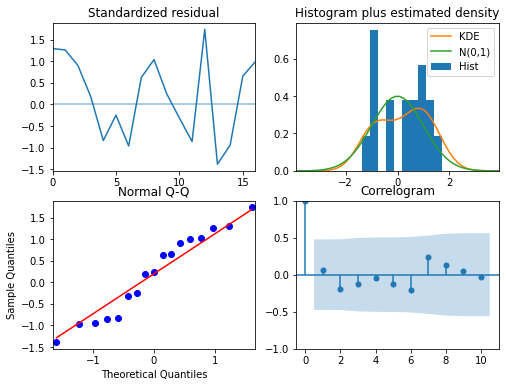

In [144]:
#Diagnostic plot for the new cases SARIMA model conducted
smodel_new_cases.plot_diagnostics(figsize=(8,6))
plt.show()

In [145]:
#Forecast the new cases for the next 7 days
n_periods=7
forecast_new_cases= smodel_new_cases.predict(n_periods=n_periods)
forecast_new_cases= pd.DataFrame(forecast_new_cases,columns=['New_cases_prediction'])

In [99]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [100]:
forecast_new_cases['Date']=date

In [101]:
forecast_new_cases = forecast_new_cases[['Date','New_cases_prediction']]

In [102]:
forecast_new_cases

,Date,New_cases_prediction
0,2021-09-09,630.193754
1,2021-09-10,724.803061
2,2021-09-11,735.329049
3,2021-09-12,822.154566
4,2021-09-13,873.864711
5,2021-09-14,921.317451
6,2021-09-15,992.345663


## Perform SARIMA model for the variable - New deaths

In [89]:
smodel_new_deaths = auto_arima(df['New deaths'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=179.635, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=176.798, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=174.057, Time=0.38 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=174.474, Time=0.58 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=1.10 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=176.053, Time=0.53 sec

Best model:  ARIMA(2,2,0)(0,0,0)[0]          
Total fit time: 4.833 seconds


In [90]:
print(smodel_new_deaths.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(2, 2, 0)   Log Likelihood                 -84.028
Date:                Wed, 15 Sep 2021   AIC                            174.057
Time:                        02:28:33   BIC                            176.556
Sample:                             0   HQIC                           174.305
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7315      0.635     -1.152      0.249      -1.976       0.513
ar.L2         -0.4756      0.265     -1.795      0.073      -0.995       0.044
sigma2      1097.9937    285.603      3.844      0.0

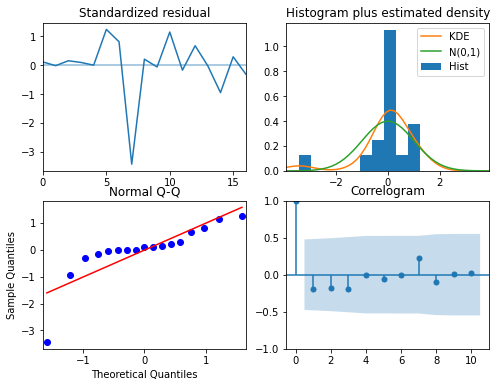

In [91]:
#Diagnostic plot for the new deaths SARIMA model conducted
smodel_new_deaths.plot_diagnostics(figsize=(8,6))
plt.show()

In [94]:
#Forecast the new deaths for the next 7 days
n_periods=7
forecast_new_deaths= smodel_new_deaths.predict(n_periods=n_periods)
forecast_new_deaths= pd.DataFrame(forecast_new_deaths,columns=['New_deaths_prediction'])

In [95]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [96]:
forecast_new_deaths['Date']=date

In [97]:
forecast_new_deaths = forecast_new_deaths[['Date','New_deaths_prediction']]

In [98]:
forecast_new_deaths

,Date,New_deaths_prediction
0,2021-09-09,-7.260488
1,2021-09-10,-7.440471
2,2021-09-11,-16.333621
3,2021-09-12,-24.598436
4,2021-09-13,-29.178921
5,2021-09-14,-36.753378
6,2021-09-15,-43.889965


## Perform ARIMA model for the variable - Total recovery

In [104]:
smodel_total_recovery = auto_arima(df['Total recovery'],start_p=1,start_q=1,test='adf',max_p=3,max_q=3,m=1,d=None,seasonal=True,trace=True,strat_p=0,D=0,error_action='ignore',supress_warning=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=324.598, Time=0.49 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=320.703, Time=0.12 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=322.948, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=322.831, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=322.702, Time=0.16 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.247 seconds


In [105]:
print(smodel_total_recovery.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   19
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -159.352
Date:                Wed, 15 Sep 2021   AIC                            320.703
Time:                        02:37:02   BIC                            321.536
Sample:                             0   HQIC                           320.786
                                 - 19                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.02e+06   1.52e+06      5.288      0.000    5.05e+06     1.1e+07
Ljung-Box (L1) (Q):                   4.44   Jarque-Bera (JB):                13.88
Prob(Q):                              0.04   Pr

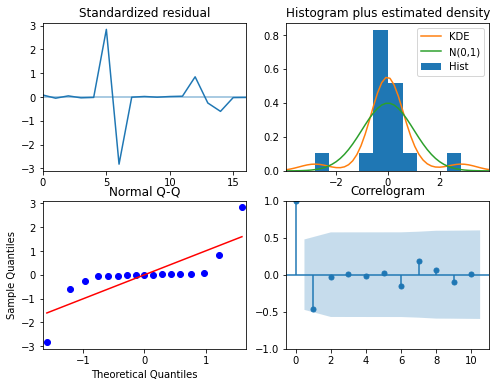

In [106]:
#Diagnostic plot for the total recovery SARIMA model conducted
smodel_total_recovery.plot_diagnostics(figsize=(8,6))
plt.show()

In [107]:
#Forecast the total recovery for the next 7 days
n_periods=7
forecast_total_recovery= smodel_total_recovery.predict(n_periods=n_periods)
forecast_total_recovery= pd.DataFrame(forecast_total_recovery,columns=['Total_recovery_prediction'])

In [108]:
date= ['2021-09-09','2021-09-10','2021-09-11','2021-09-12','2021-09-13','2021-09-14','2021-09-15']

In [109]:
forecast_total_recovery['Date']=date

In [110]:
forecast_total_recovery = forecast_total_recovery[['Date','Total_recovery_prediction']]

In [111]:
forecast_total_recovery

,Date,Total_recovery_prediction
0,2021-09-09,185599.0
1,2021-09-10,185819.0
2,2021-09-11,186039.0
3,2021-09-12,186259.0
4,2021-09-13,186479.0
5,2021-09-14,186699.0
6,2021-09-15,186919.0
